In [1]:
#importing all necessary packages 
import torch
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import h5py 
import tqdm 
import scipy 


In [2]:
#Declaring Variable Values

T0 = 2 * np.pi 
NT = 128 
DELTAT = T0 / NT
BOXSIZE = 8
ND = 1000
DELTAX = BOXSIZE / ND
HBAR = 1
HBAR = 1
OMEGA = 1
XSTART = 0

t = np.linspace(0, T0, NT + 1)
x = np.linspace(-BOXSIZE / 2, BOXSIZE / 2, ND + 1)

C:\Users\Nyan\AppData\Local\Temp\ipykernel_25120\3772466315.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


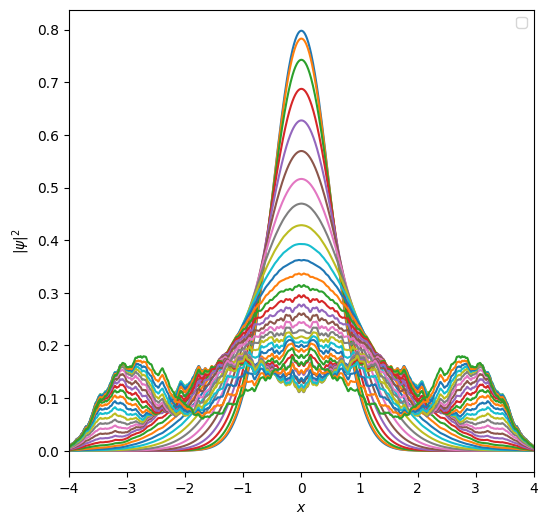

In [5]:
#Propagating the Wavefunction
XSTART = 0

t = np.linspace(0, T0, NT + 1)
x = np.linspace(-BOXSIZE / 2, BOXSIZE / 2, ND + 1)

def func_psi_0(x, x_start):
    alpha = 2
    return (alpha / np.pi) ** (1 / 4) * np.exp(-alpha / 2 * (x - x_start)**2)

psi_0 = func_psi_0(x, XSTART)
xmin, xmax = -BOXSIZE / 2, BOXSIZE / 2
def func_K(x_j, x_i, dt):
    coefficient = np.sqrt(1 / (2 * np.pi * 1j * HBAR * dt))
    exponent = 1j * (x_j - x_i)**2 / (2 * HBAR * dt)
    return coefficient * np.exp(exponent)

K_dt = np.zeros((ND + 1, ND + 1), dtype=np.complex64)
for i in range(ND + 1):
    for j in range(ND + 1):
        K_dt[i, j] = func_K(x[j], x[i], DELTAT)

psi = [psi_0]

for i in range(1, NT + 1):
    psi_t = DELTAX * np.matmul(K_dt, psi[i-1])
    psi.append(psi_t)

prob = []
for i in range(NT + 1):
    prob.append(np.real(psi[i] * psi[i].conjugate()))
plt.figure(figsize=(6, 6))
plot_interval = 2
for i in range(0, NT // 2 + 1, plot_interval):
    # plot the probability distribution and label it with the time
    plt.plot(x, prob[i])
plt.xlabel(r"$x$")
plt.ylabel(r"$|\psi|^2$")
plt.xlim([xmin, xmax])
plt.legend()
plt.show()
#create dataset
training_data = []
with h5py.File("training_data1.hdf5", "w") as f:
    training_data = f.create_dataset("Training", data=prob)